# Software Professionals Salary analysis

Working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) there is thesource of the data (Kaggle) as well as more information on its composition. 

**Setup:** Imported the necessary libraries and load the .csv file to a DataFrame named `sps`. Checked that all columns have the correct data type. 

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import requests

In [2]:
sps = pd.read_csv('data/Software Professionals Salary.csv')

In [3]:
sps.head(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [4]:
sps.dtypes

Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object

1. Checked what the shape (rows, cols) of the `sps` DataFrame looks like.

In [5]:
sps.shape

(22770, 8)

2. Checked how many unique `Job Roles` there are in the dataset.

In [6]:
sps['Job Roles'].nunique()

11

3. Checked how many unique `Job Title` there are for the "Python" `Job Role`.

In [7]:
python_job_role_titles = sps[sps['Job Roles'] == 'Python']['Job Title']

In [8]:
python_job_role_titles.nunique()

102

4. Of the `Company Name`s that are listed in the DataFrame, found out **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst".

In [9]:
python_job_role_titles[python_job_role_titles.str.contains("Analyst")].nunique()

3

5. Checked which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s).

In [10]:
sps.groupby('Company Name')['Salaries Reported'].sum().sort_values(ascending=False).head(1)

Company Name
Amazon    2636
Name: Salaries Reported, dtype: int64

6. Given the `Company Name` you found at the previous question, found out how many `Location`s this company is present in? 

In [11]:
sps[sps['Company Name'] == 'Amazon']['Location'].nunique()

9

7. Noticed that the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, created a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. Checked the conversion rate between USD-INR at the time of execution? *Note: of course, this result will change in time*

In [12]:
exc = requests.get('https://open.er-api.com/v6/latest/USD')

In [13]:
exc.status_code

200

In [14]:
exc_json = exc.json()

In [15]:
type(exc_json)

dict

In [16]:
exc_json.keys()

dict_keys(['result', 'provider', 'documentation', 'terms_of_use', 'time_last_update_unix', 'time_last_update_utc', 'time_next_update_unix', 'time_next_update_utc', 'time_eol_unix', 'base_code', 'rates'])

In [17]:
exc_json['rates'].keys()

dict_keys(['USD', 'AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG', 'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND', 'BOB', 'BRL', 'BSD', 'BTN', 'BWP', 'BYN', 'BZD', 'CAD', 'CDF', 'CHF', 'CLP', 'CNY', 'COP', 'CRC', 'CUP', 'CVE', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ERN', 'ETB', 'EUR', 'FJD', 'FKP', 'FOK', 'GBP', 'GEL', 'GGP', 'GHS', 'GIP', 'GMD', 'GNF', 'GTQ', 'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF', 'IDR', 'ILS', 'IMP', 'INR', 'IQD', 'IRR', 'ISK', 'JEP', 'JMD', 'JOD', 'JPY', 'KES', 'KGS', 'KHR', 'KID', 'KMF', 'KRW', 'KWD', 'KYD', 'KZT', 'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LYD', 'MAD', 'MDL', 'MGA', 'MKD', 'MMK', 'MNT', 'MOP', 'MRU', 'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'MZN', 'NAD', 'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK', 'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'RWF', 'SAR', 'SBD', 'SCR', 'SDG', 'SEK', 'SGD', 'SHP', 'SLE', 'SLL', 'SOS', 'SRD', 'SSP', 'STN', 'SYP', 'SZL', 'THB', 'TJS', 'TMT', 'TND', 'TOP', 'TRY', 'T

In [18]:
inr = exc_json['rates']['INR']
print(inr)

82.336032


Note: 1 USD = 82.296882 INR at time of execution.

In [19]:
sps['Salary USD'] = sps['Salary']/inr

In [20]:
sps['Salary USD'] = sps['Salary USD'].round(0)

In [21]:
sps

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4858.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4858.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12145.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3644.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7287.0
...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,2429.0
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,3644.0
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,2332.0
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,3644.0


8. Checked what is the average `Salary USD` for the "Python" `Job Role`. 

In [22]:
sps[sps['Job Roles'] == 'Python']['Salary USD'].mean()

5902.937697993664

9. Checked which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s.

In [23]:
sps.groupby('Company Name')['Salary USD'].mean().sort_values(ascending=False).head(1)

Company Name
Thapar University    1093082.0
Name: Salary USD, dtype: float64

10. Created a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`.

In [24]:
sps_group = sps.groupby('Company Name', as_index=False)[['Rating', 'Salary USD']].mean()

<AxesSubplot: xlabel='Rating', ylabel='Salary USD'>

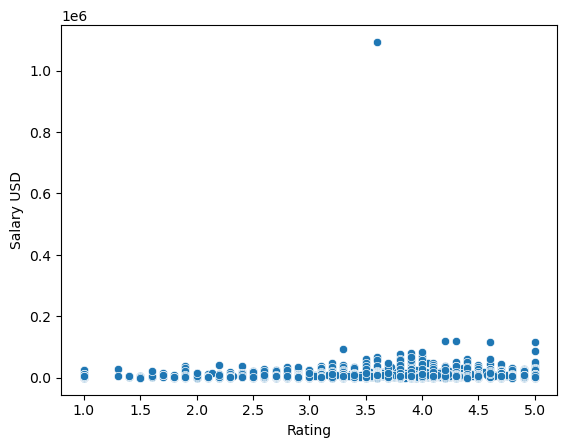

In [25]:
sns.scatterplot(x='Rating', y='Salary USD', data = sps_group)

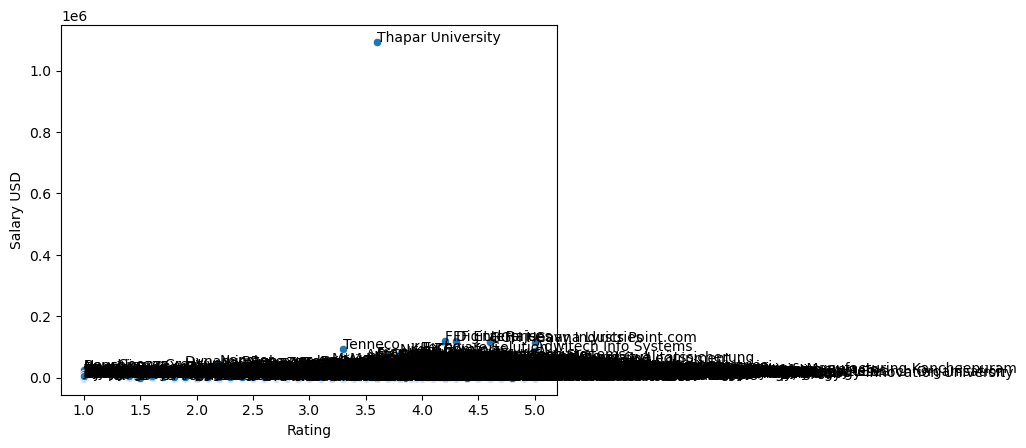

In [26]:
companies = sps_group['Company Name']
rating = sps_group['Rating']
salary_usd = sps_group['Salary USD']

sns.scatterplot(x='Rating', y='Salary USD', data=sps_group)
for i, company in enumerate (companies):
    plt.annotate(company, (rating[i], salary_usd[i]))

There is an anomaly in this plot, and Thapar University is the one causing this oddity.<br> Other than that, there seems to be a positive direct relationship between average salary and rating.

In [27]:
sps_no_thapar = sps.loc[sps['Company Name'] != 'Thapar University']

<AxesSubplot: xlabel='Rating', ylabel='Salary USD'>

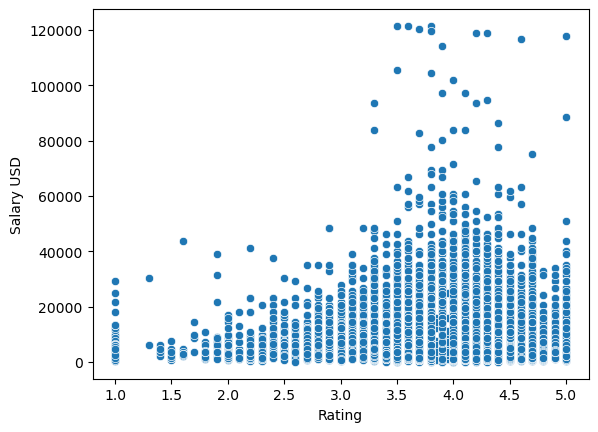

In [28]:
sns.scatterplot(x='Rating', y='Salary USD', data = sps_no_thapar)